# Figuring Our Which Customers May Leave - Churn Analysis

### About the Dataset
Source - https://www.kaggle.com/blastchar/telco-customer-churn
1. We have customer information for a Telecommunications company
2. We've got customer IDs, general customer info, the servies they've subscribed too, type of contract and monthly charges.
3. This is a historic customer information so we have a field stating whether that customer has **churnded** 
**Field Descriptions**
- customerID - Customer ID
- gender - Whether the customer is a male or a female
- SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod - The customer’s payment method (Electronic check, Mailed check Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

***Customer Churn*** - churn is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company.

**Aim -** is to figure our which customers may likely churn in futuremers may likely churn in future

In [12]:
# Load our data
import pandas as pd

# Uncomment this line if using this notebook locally
#churn_df = pd.read_csv('archive/WA_Fn-UseC_-Telco-Customer-Churn.csv') 

file_name = "https://raw.githubusercontent.com/Amateurdev-Ash/Telco-Customer-Churn/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
churn_df = pd.read_csv(file_name)

# We use the dataframe name followed by a '.head()' to use the head function to preview the first 5 records of the dataframe

churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# Get summary stats on our numeric columns
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
#List unique values in the dataframe e.g. by doing df['name'] column
churn_df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [18]:
churn_df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [20]:
len(churn_df.MonthlyCharges.unique())

1585

In [22]:
# Summarize our dataset 
print ("Rows     : " ,churn_df.shape[0])
print ("Columns  : " ,churn_df.shape[1])
print ("\nFeatures : \n" ,churn_df.columns.tolist())
print ("\nMissing values :  ", churn_df.isnull().sum().values.sum())
print ("\nUnique values :  \n",churn_df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [24]:
churn_df['Churn'].value_counts(sort = False)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [26]:
churn_df_copy = churn_df.copy()

In [29]:
churn_df_copy.drop(['customerID','MonthlyCharges', 'TotalCharges', 'tenure'], axis=1, inplace=True)
churn_df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [31]:
summary = pd.concat([pd.crosstab(churn_df_copy[x], churn_df_copy.Churn) for x in churn_df_copy.columns[:-1]], keys=churn_df_copy.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

### Let's make a percentage column

In [36]:
summary['Churn_Percentage'] = summary['Yes'] / (summary['No'] + summary['Yes'])
summary

Churn                                         No   Yes  Churn_Percentage
gender           Female                     2549   939          0.269209
                 Male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          No                         2441  1200          0.329580
                 Yes                        2733   669          0.196649
Dependents       No                         3390  1543          0.312791
                 Yes                        1784   326          0.154502
PhoneService     No                          512   170          0.249267
                 Yes                        4662  1699          0.267096
MultipleLines    No                         2541   849          0.250442
                 No phone service            512   170          0.249267
                 Yes                        2121   850          0.286099
InternetService  DSL                        1962   459          0.189591
                 Fiber optic                1799  1297          0.418928
                 No                         1413   113          0.074050
OnlineSecurity   No                         2037  1461          0.417667
                 No internet service        1413   113          0.074050
                 Yes                        1724   295          0.146112
OnlineBackup     No                         1855  1233          0.399288
                 No internet service        1413   113          0.074050
                 Yes                        1906   523          0.215315
DeviceProtection No                         1884  1211          0.391276
                 No internet service        1413   113          0.074050
                 Yes                        1877   545          0.225021
TechSupport      No                         2027  1446          0.416355
                 No internet service        1413   113          0.074050
                 Yes                        1734   310          0.151663
StreamingTV      No                         1868   942          0.335231
                 No internet service        1413   113          0.074050
                 Yes                        1893   814          0.300702
StreamingMovies  No                         1847   938          0.336804
                 No internet service        1413   113          0.074050
                 Yes                        1914   818          0.299414
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1307   166          0.112695
                 Two year                   1647    48          0.028319
PaperlessBilling No                         2403   469          0.163301
                 Yes                        2771  1400          0.335651
PaymentMethod    Bank transfer (automatic)  1286   258          0.167098
                 Credit card (automatic)    1290   232          0.152431
                 Electronic check           1294  1071          0.452854
                 Mailed check               1304   308          0.191067

### Visualizations and EDA

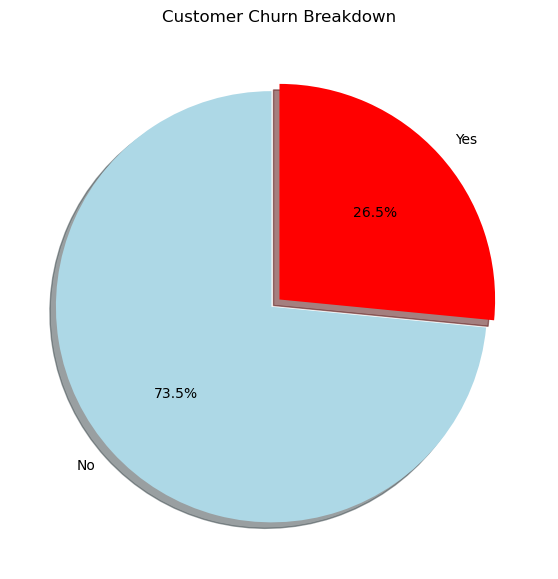

In [39]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from pylab import rcParams # Customize Matplotlib plots using rcParams

# Data to plot
labels = churn_df['Churn'].value_counts(sort = True).index
sizes = churn_df['Churn'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

In [41]:
labels

Index(['No', 'Yes'], dtype='object', name='Churn')

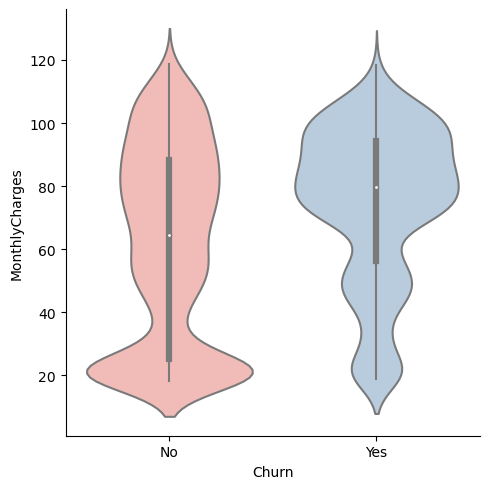

In [49]:
# Create a Volin Plot showing how monthy charges relate to Churn
# We an see that Churned customers tend to be higher paying customers
g = sns.catplot(x="Churn", y = "MonthlyCharges",data = churn_df, kind="violin", palette = "Pastel1")

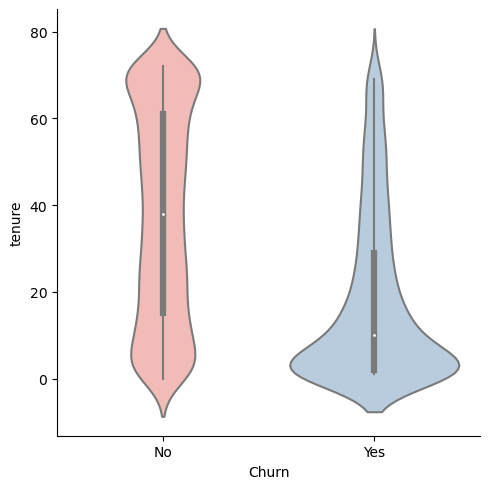

In [51]:
# Let's look at Tenure
g = sns.catplot(x="Churn", y = "tenure",data = churn_df, kind="violin", palette = "Pastel1")

# Prepare Data for Machine Learning Classifer

In [56]:
# Check for empty fields, Note, " " is not Null but a spaced character
len(churn_df[churn_df['TotalCharges'] == " "])

11

In [58]:
## Drop missing data
churn_df = churn_df[churn_df['TotalCharges'] != " "]

In [60]:
len(churn_df[churn_df['TotalCharges'] == " "])

0

In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col = ['customerID']

#Target columns
target_col = ["Churn"]

#categorical columns
cat_cols = churn_df.nunique()[churn_df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in churn_df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols = churn_df.nunique()[churn_df.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    churn_df[i] = le.fit_transform(churn_df[i])
    
#Duplicating columns for multi value columns
churn_df = pd.get_dummies(data = churn_df, columns = multi_cols )
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [68]:
len(churn_df.columns)

42

In [71]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [73]:
#Scaling Numerical columns
std = StandardScaler()

# Scale data
scaled = std.fit_transform(churn_df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = churn_df.copy()
churn_df = churn_df.drop(columns = num_cols,axis = 1)
churn_df = churn_df.merge(scaled, left_index=True, right_index=True, how = "left")

#churn_df.info()
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,1,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,1,1,1,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [75]:
churn_df.drop(['customerID'], axis=1, inplace=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [78]:
churn_df[churn_df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
7032,1,1,0,0,1,1,1,0,0,1,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7033,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,NaN,NaN,NaN
7034,0,0,0,0,1,1,1,0,0,1,...,1,0,0,0,1,0,0,NaN,NaN,NaN
7035,1,0,0,0,1,1,0,1,0,0,...,1,0,0,1,0,0,0,NaN,NaN,NaN
7036,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,NaN,NaN,NaN
7037,0,0,0,0,1,1,0,1,0,0,...,0,0,1,1,0,0,0,NaN,NaN,NaN
7038,1,0,1,1,1,1,0,0,0,1,...,0,1,0,0,0,0,1,NaN,NaN,NaN
7039,0,0,1,1,1,1,0,0,0,1,...,0,1,0,0,1,0,0,NaN,NaN,NaN
7040,0,0,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7041,1,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,1,NaN,NaN,NaN


In [80]:
churn_df = churn_df.dropna()

In [82]:
# Double check that nulls have been removed
churn_df[churn_df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges


# Modeling

In [85]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = churn_df.drop(['Churn'], axis=1).values

# We assigned those label values to our Y dataset
y = churn_df['Churn'].values

In [87]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [89]:
print(len(churn_df.columns))
churn_df.columns

41


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_E

In [91]:
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


# Fit a Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7864261983863313
[[1369  170]
 [ 280  288]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.63      0.51      0.56       568

    accuracy                           0.79      2107
   macro avg       0.73      0.70      0.71      2107
weighted avg       0.78      0.79      0.78      2107



In [97]:
# Let's see what features mattered most i.e. Feature Importance
# We sort on the co-efficients with the largest weights as those impact the resulting output the most 
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.041159571293926216, 0.10647438552775237, 0.23767193188853483, 0.1649368127628452, 0.2440795277827244, 0.2330411992802156, 0.13355438815864273, 0.21882537490033854, 0.11052513962407987, 0.4779313328836333, 0.24428945498140864, 0.22926302478083707, 0.17492999597300257, 0.22926302478083707, 0.4085718738752269, 0.057876822730192845, 0.22926302478083707, 0.29151870063241725, 0.045119447728106006, 0.22926302478083707, 0.18852243017411857, 0.09503725676788696, 0.22926302478083707, 0.32867913467011095, 0.19528363950438468, 0.22926302478083707, 0.038358238397838765, 0.22716038300490102, 0.22926302478083707, 0.0064814948973227855, 0.9932010224975694, 0.28060902204194643, 1.1754969031386844, 0.29088556080965705, 0.3243067718391407, 0.20649339469369063, 0.054205964727953186, 0.01734801344981762, 0.06572302693561854, 0.0796429934996311]


In [99]:
# Finding and deleting the label column
cols = list(churn_df.columns)
cols.index('Churn')

6

In [101]:
del cols[6]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [103]:
# Sorting on Feature Importance
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

Contract_Two year
Contract_Month-to-month
InternetService_DSL
OnlineSecurity_Yes
TechSupport_Yes
PaymentMethod_Credit card (automatic)
OnlineBackup_Yes
PaymentMethod_Bank transfer (automatic)
Contract_One year
InternetService_Fiber optic
PhoneService
Partner
PaperlessBilling
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
StreamingMovies_No
MultipleLines_No phone service
PaymentMethod_Electronic check
StreamingTV_No
DeviceProtection_Yes
OnlineSecurity_No
Dependents
MultipleLines_No
MultipleLines_Yes
SeniorCitizen
TechSupport_No
TotalCharges
MonthlyCharges
OnlineBackup_No
PaymentMethod_Mailed check
DeviceProtection_No
gender
StreamingTV_Yes
tenure
StreamingMovies_Yes


# Try Random Forests

In [106]:
# Let's try Random Forests now to see if our resutls get better
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.757000474608448
[[1342  197]
 [ 315  253]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1539
           1       0.56      0.45      0.50       568

    accuracy                           0.76      2107
   macro avg       0.69      0.66      0.67      2107
weighted avg       0.74      0.76      0.75      2107



# Saving & Loading Models

In [110]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(model_rf, f)

# load
with open('model.pkl', 'rb') as f:
    loaded_model_rf = pickle.load(f)

In [114]:
predictions = loaded_model_rf.predict(X_test)
predictions

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [126]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.16.2


''

In [128]:
# Create a simple model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(20, kernel_initializer = "uniform",activation = "relu", input_dim=40))
model.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 841 (3.29 KB)

 Trainable params: 841 (3.29 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
# Start Training Our Classifier 

batch_size = 64
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6924 - loss: 0.6666 - val_accuracy: 0.7304 - val_loss: 0.5647
Epoch 2/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7417 - loss: 0.5288 - val_accuracy: 0.7584 - val_loss: 0.4750
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7775 - loss: 0.4638 - val_accuracy: 0.7831 - val_loss: 0.4498
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7859 - loss: 0.4385 - val_accuracy: 0.7812 - val_loss: 0.4450
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7828 - loss: 0.4439 - val_accuracy: 0.7817 - val_loss: 0.4427
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7793 - loss: 0.4383 - val_accuracy: 0.7817 - val_loss: 0.4415
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.4238 - val_accuracy: 0.7850 - val_loss: 0.4407
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7913 - loss: 0.4323 - val_accuracy: 0.7860 - val_loss:

In [134]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1353  186]
 [ 272  296]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1539
           1       0.61      0.52      0.56       568

    accuracy                           0.78      2107
   macro avg       0.72      0.70      0.71      2107
weighted avg       0.77      0.78      0.78      2107



## Saving and Loading our Deep Learning models

In [139]:
model.save("simple_cnn_25_epochs.keras")
print("Model Saved")

Model Saved


## Let's try a Deeper Model and Learn to use Checkpoints and Early stopping

In [144]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(2000, activation='relu', input_dim=40, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(1000, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(500, activation = 'relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

# Create our checkpoint so that we save each model after each epoch
checkpoint = ModelCheckpoint("deep_model_checkpoint.keras",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 2000)                │          82,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1000)                │       2,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,584,001 (9.86 MB)

 Trainable params: 2,584,001 (9.86 MB)

 Non-trainable params: 0 (0.00 B)

In [146]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [148]:
# Define our earling stoppping criteria
from tensorflow.keras.callbacks import EarlyStopping 

earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 2, #Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

In [150]:
batch_size = 32
epochs = 10

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    # NOTE We are adding our callbacks here
                    callbacks = callbacks,
                    validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7602 - loss: 6.9063
Epoch 1: val_loss improved from inf to 0.53013, saving model to deep_model_checkpoint.keras
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7604 - loss: 6.8526 - val_accuracy: 0.7608 - val_loss: 0.5301
Epoch 2/10
150/154 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7691 - loss: 0.5130
Epoch 2: val_loss improved from 0.53013 to 0.48866, saving model to deep_model_checkpoint.keras
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7693 - loss: 0.5127 - val_accuracy: 0.7812 - val_loss: 0.4887
Epoch 3/10
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7776 - loss: 0.4963
Epoch 3: val_loss did not improve from 0.48866
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7776 - loss: 0.4963 - val_accuracy: 0.7784 - val_loss: 0.4897
Epoch 4/10
153/154 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7745 - loss: 0.4991
Epoch 4: val_loss did not improve from 0.48866
154/154 ━━━━━━━━